<a href="https://colab.research.google.com/github/dkm4/Multi-class-classification-model-/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# imports

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.1.0+cu121


# Assign the device

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"My device is {device}")

My device is cuda


# Build our dataset

In [ ]:
from sklearn.datasets import make_blobs

NUM_CLASSES  = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
N_SAMPLES   = 100
x_blob, y_blob = make_blobs(n_samples = N_SAMPLES, n_features = NUM_FEATURES, centers = NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)




In [ ]:
print(f"x blob is {x_blob}")
print(f"y blob ias {y_blob}")
print(f"x blob type is {type(x_blob)}")
print(f"y blob type is {type(y_blob)}")
print(f"x blob shape is {x_blob.shape}")
print(f"y blob shape is {y_blob.shape}")

x blob is [[-10.10851833   5.05125208]
 [ -5.65935137  -8.72640607]
 [ -3.2134092    9.82812619]
 [ -4.77543572  -8.98288619]
 [ -8.30164672   8.16469971]
 [ -8.36543168  -7.72955619]
 [  5.13677398   3.43648737]
 [  4.310371     2.50883854]
 [  4.78549516   3.42613717]
 [ -4.23568799   9.57783316]
 [ -3.32577171   9.18067001]
 [ -6.53843729  -4.91939546]
 [ -6.09671484  -6.43463258]
 [  2.98037638   0.17885975]
 [ -1.40149775   9.27133855]
 [-10.4446665    8.04723154]
 [ -8.42329156   8.56429779]
 [  4.53186365   3.47846903]
 [-10.16411391   7.55411057]
 [ -8.12847132   7.21427955]
 [ -3.20432416   8.3156915 ]
 [ -8.95398032   7.83525088]
 [ -9.50810018   8.60812111]
 [  5.18197224   4.28022453]
 [  4.58613978   4.32013517]
 [ -3.20015578  10.59996947]
 [  2.51682272   1.3422017 ]
 [ -7.89982673   6.03778658]
 [-10.30035026   8.50414982]
 [ -8.73505326  -8.86079451]
 [ -7.89966427  -6.53172905]
 [  5.08405925   2.36475259]
 [ -7.16816864  -6.42778858]
 [ -7.10043439   6.09249944]
 [ -

# Plot my dataset

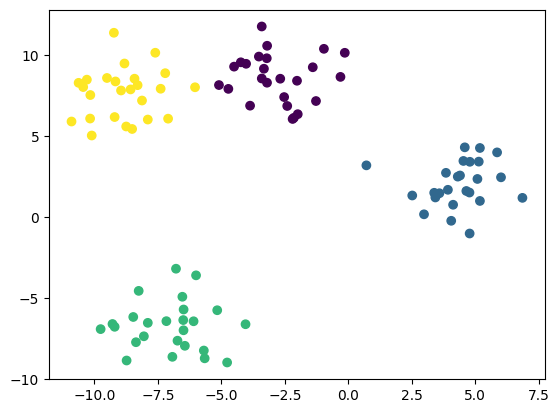

In [ ]:
plt.scatter(x_blob[:, 0], x_blob[:, 1], c=y_blob)

# Convert these numpy to tensors

In [ ]:
X_tensor = torch.from_numpy(x_blob).type(torch.float).to(device)
# ytensor should be long
y_tensor = torch.from_numpy(y_blob).type(torch.long).to(device)

print(f"{X_tensor.shape} and {X_tensor.device} and {X_tensor.dtype}")
print(f"{y_tensor.shape} and {y_tensor.device} and {y_tensor.dtype}")

torch.Size([100, 2]) and cuda:0 and torch.float32
torch.Size([100]) and cuda:0 and torch.int64


# Train/test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.20, random_state=42)

# Plot train/test split

Information about training dataset torch.Size([80, 2])


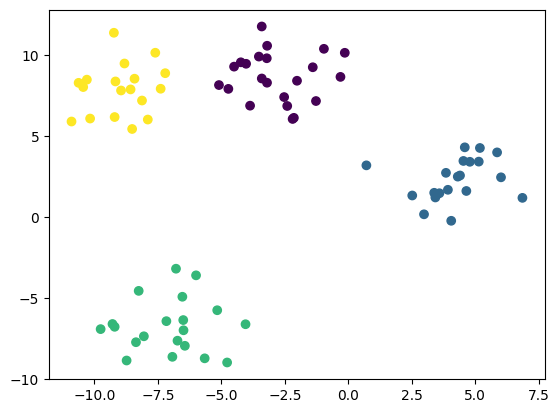

In [ ]:
print(f"Information about training dataset {X_train.shape}")
plt.scatter(X_train[:, 0].cpu(), X_train[:, 1].cpu(), c=y_train.cpu())

Information about test dataset torch.Size([20, 2])


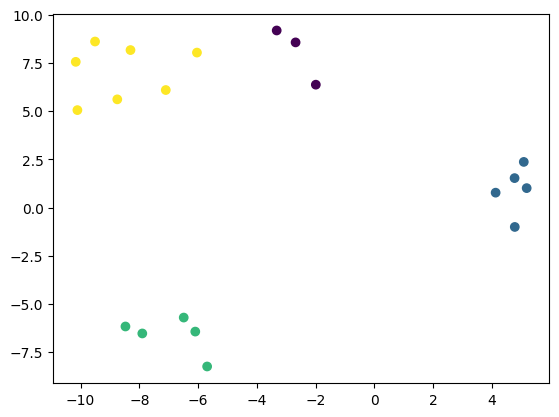

In [ ]:
print(f"Information about test dataset {X_test.shape}")
plt.scatter(X_test[:, 0].cpu(), X_test[:, 1].cpu(), c=y_test.cpu())

# Design a Neural Network

In [ ]:
#in_features=2, out_features=4
#NN:-(1000000, 2)->(1000000, 4)
class MulticlassNN(nn.Module):
  def __init__(self, in_features, out_features, hidden_units=8):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Linear(in_features=in_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units*2),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units*2, out_features=out_features),
    )

  def forward(self, x):
    return self.layer(x)

In [ ]:
model = MulticlassNN(NUM_FEATURES, NUM_CLASSES).to(device)
model

MulticlassNN(
  (layer): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=4, bias=True)
  )
)

In [ ]:
model.state_dict()

OrderedDict([('layer.0.weight',
              tensor([[ 0.3557,  0.4390],
                      [-0.5228,  0.4906],
                      [-0.0387,  0.1586],
                      [ 0.1255,  0.6633],
                      [-0.4566, -0.1498],
                      [-0.2810, -0.0255],
                      [ 0.2925,  0.2505],
                      [ 0.0439,  0.5723]], device='cuda:0')),
             ('layer.0.bias',
              tensor([ 0.0891, -0.1746,  0.5786, -0.5920, -0.5005,  0.5527, -0.1274,  0.3768],
                     device='cuda:0')),
             ('layer.2.weight',
              tensor([[ 3.3839e-03, -1.1903e-01, -1.2421e-01,  3.0998e-01,  6.5029e-02,
                        8.2599e-02,  1.5911e-01,  2.5043e-01],
                      [-1.7657e-01,  2.0233e-01,  1.0458e-01,  3.2103e-01, -1.3738e-01,
                        1.2552e-01, -1.9862e-01, -8.4499e-02],
                      [-3.4046e-01, -1.5564e-01, -3.4598e-01, -2.8151e-01,  4.1948e-02,
                        2

# Send some random input and get the output back

In [ ]:
#untrained model
random_output = model(X_tensor)
print(f"My input shape is {X_tensor.shape} and dtype {X_tensor.dtype}")
print(f"My output shape is {random_output.shape} and dtype {random_output.dtype}")

My input shape is torch.Size([100, 2]) and dtype torch.float32
My output shape is torch.Size([100, 4]) and dtype torch.float32


# How to get the output back from model

In [ ]:
#untrained model
logits = model(torch.rand(3, 2).type(torch.float32).to(device))
print(f"My input shape is {X_tensor.shape} and dtype {X_tensor.dtype}")
print(f"My logits shape is {logits.shape} and dtype {logits.dtype}")
print(f"My logits are {logits}")
softmax_values = torch.softmax(logits, dim=1)
print(softmax_values.shape)
print(f"My softmax is {softmax_values} and its shape is {softmax_values.shape}")
y_preds = torch.argmax(softmax_values, dim=1)
print(f"my ypred are {y_preds} and its shape is {y_preds.shape}")
print(torch.softmax(logits, dim=1).argmax(dim=1))

My input shape is torch.Size([100, 2]) and dtype torch.float32
My logits shape is torch.Size([3, 4]) and dtype torch.float32
My logits are tensor([[ 0.1960, -0.1446, -0.2707,  0.2285],
        [ 0.1423, -0.1133, -0.2800,  0.2498],
        [ 0.1759, -0.1345, -0.2848,  0.2189]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
torch.Size([3, 4])
My softmax is tensor([[0.2966, 0.2110, 0.1860, 0.3064],
        [0.2822, 0.2186, 0.1850, 0.3142],
        [0.2934, 0.2151, 0.1851, 0.3063]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>) and its shape is torch.Size([3, 4])
my ypred are tensor([3, 3, 3], device='cuda:0') and its shape is torch.Size([3])
tensor([3, 3, 3], device='cuda:0')


# Create a loss function and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.06)

# Please check if the loss function is giving some number

In [ ]:
#untrained model
random_output = model(X_tensor)
#the bug is your y_tensor is expected to be Long
print(f"dtype 1 {random_output.dtype} and dtype2 {y_tensor.dtype}")
loss_fn(random_output, y_tensor)

dtype 1 torch.float32 and dtype2 torch.int64


tensor(1.6534, device='cuda:0', grad_fn=<NllLossBackward0>)

# Start training the model

In [ ]:
def acc_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/ len(y_true))*100.0
  return acc

In [ ]:
epochs = 50000
for epoch in range(epochs):
  #put my model in training model
  model.train()
  #make predictions for my training dataset
  logits = model(X_train).squeeze()
  #I calculate the loss
  training_loss = loss_fn(logits, y_train)
  y_preds = torch.softmax(logits, dim=1).argmax(dim=1)
  training_acc = acc_fn(y_train, y_preds)

  #make all the previous gradients to zero
  optimizer.zero_grad()
  #compute the gradients
  training_loss.backward()
  #take an optimization step
  optimizer.step()

  model.eval() #eval stage
  with torch.no_grad():
    test_logits = model(X_test).squeeze()
    test_loss = loss_fn(test_logits, y_test)
    y_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
    testing_acc = acc_fn(y_test, y_preds)

  if epoch%1==0:
    print(f"Epoch: {epoch} | Training Loss: {training_loss} | Training Acc: {training_acc} | Testing Loss: {test_loss} | Testing Acc: {testing_acc}")


Epoch: 0 | Training Loss: 1.6890232563018799 | Training Acc: 22.5 | Testing Loss: 1.355880618095398 | Testing Acc: 35.0
Epoch: 1 | Training Loss: 1.468564748764038 | Training Acc: 22.5 | Testing Loss: 1.232939600944519 | Testing Acc: 60.0
Epoch: 2 | Training Loss: 1.3076642751693726 | Training Acc: 46.25 | Testing Loss: 1.1298115253448486 | Testing Acc: 60.0
Epoch: 3 | Training Loss: 1.1785430908203125 | Training Acc: 47.5 | Testing Loss: 1.0402412414550781 | Testing Acc: 70.0
Epoch: 4 | Training Loss: 1.0713337659835815 | Training Acc: 61.25000000000001 | Testing Loss: 0.9617916345596313 | Testing Acc: 75.0
Epoch: 5 | Training Loss: 0.9815413355827332 | Training Acc: 71.25 | Testing Loss: 0.8923784494400024 | Testing Acc: 75.0
Epoch: 6 | Training Loss: 0.9048677682876587 | Training Acc: 73.75 | Testing Loss: 0.8296078443527222 | Testing Acc: 85.0
Epoch: 7 | Training Loss: 0.8378434181213379 | Training Acc: 77.5 | Testing Loss: 0.7723069787025452 | Testing Acc: 95.0
Epoch: 8 | Training

KeyboardInterrupt: 

# Check on one manual example

In [ ]:
print(f"My output class is {torch.softmax(model(torch.tensor([[1.0, 2.0]]).to(device)), dim=1).argmax(dim=1).cpu().item()}")

My output class is 1
